## Business Case: Walmart - Confidence Interval and CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

|Variable    |Description       |
|:--------------|:-------------------|
|User_ID:| 	User ID|
|Product_ID:| 	Product ID
|Gender:| 	Sex of User
|Age:| 	Age in bins
|Occupation:| 	Occupation(Masked)
|City_Category:| 	Category of the City (A,B,C)
|StayInCurrentCityYears:| 	Number of years stay in current city
|Marital_Status:| 	Marital Status
|ProductCategory:| 	Product Category (Masked)
|Purchase:| 	Purchase Amount


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0


In [ ]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 300,528 
Number of columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300528 entries, 0 to 300527
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     300528 non-null  int64  
 1   Product_ID                  300528 non-null  object 
 2   Gender                      300528 non-null  object 
 3   Age                         300528 non-null  object 
 4   Occupation                  300528 non-null  int64  
 5   City_Category               300527 non-null  object 
 6   Stay_In_Current_City_Years  300527 non-null  object 
 7   Marital_Status              300527 non-null  float64
 8   Product_Category            300527 non-null  float64
 9   Purchase                    300527 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 22.9+ MB


##### Change the data types of - **`Occupation`**, **`Marital_Status`**, **`Product_Category`**

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [ ]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category               object
Purchase                      float64
dtype: object

In [ ]:
df.memory_usage()

Index                             128
User_ID                       2404224
Product_ID                    2404224
Gender                        2404224
Age                           2404224
Occupation                    2404224
City_Category                 2404224
Stay_In_Current_City_Years    2404224
Marital_Status                2404224
Product_Category              2404224
Purchase                      2404224
dtype: int64

In [ ]:
df.describe()

,User_ID,Purchase
count,3.005280e+05,300527.000000
mean,1.002950e+06,9322.272528
std,1.707342e+03,4973.537984
min,1.000001e+06,185.000000
25%,1.001458e+06,5865.000000
50%,1.002970e+06,8059.000000
75%,1.004344e+06,12063.000000
max,1.006040e+06,23961.000000


#### Observations
- There are no missing values in the dataset.
- Purchase amount might have outliers.

In [ ]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

**How many users are there in the dataset?**

In [ ]:
df['User_ID'].nunique()

5891

**How many products are there?**

In [ ]:
df['Product_ID'].nunique()

3527

**Value_counts for the following:**
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027126
                           18-25  0.183407
                           26-35  0.398149
                           36-45  0.199585
                           46-50  0.082129
                           51-55  0.070240
                           55+    0.039364
City_Category              A      0.268680
                           B      0.422197
                           C      0.309119
Gender                     F      0.245478
                           M      0.754522
Marital_Status             0      0.590491
                           1      0.409506
Occupation                 0      0.126770
                           1      0.085253
                           2      0.048095
                           3      0.032523
                           4      0.131895
                           5      0.021732
                           6      0.037155
                           7      0.107977
                           8      0.002772
                           9      0.011533
                           10     0.023239
                           11     0.021369
                           12     0.056015
                           13     0.014282
                           14     0.049749
                           15     0.021951
                           16     0.045783
                           17     0.073195
                           18     0.011932
                           19     0.015503
                           20     0.061279
Product_Category           1      0.257207
                           2      0.043816
                           3      0.037125
                           4      0.021552
                           5      0.277139
                           6      0.036852
                           7      0.006798
                           8      0.208746
                           9      0.000725
                           10     0.009374
                           11     0.044465
                           12     0.007174
                           13     0.010079
                           14     0.002712
                           15     0.011516
                           16     0.018038
                           17     0.001078
                           18     0.005600
Stay_In_Current_City_Years 0      0.134913
                           1      0.351914
                           2      0.185197
                           3      0.173328
                           4+     0.154644

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

### Univariate Analysis

##### Understanding the distribution of data and detecting outlies for continuous variables

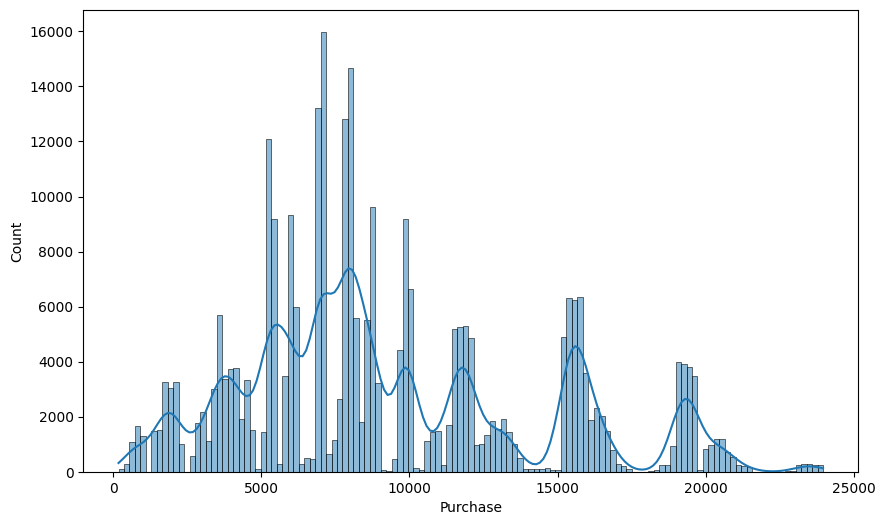

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

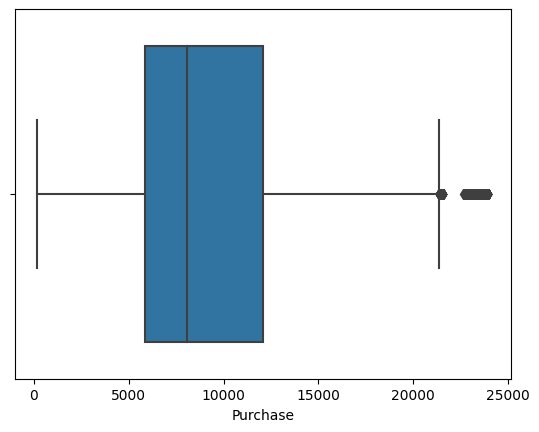

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

#### Observation
- Purchase is having outliers

#### Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

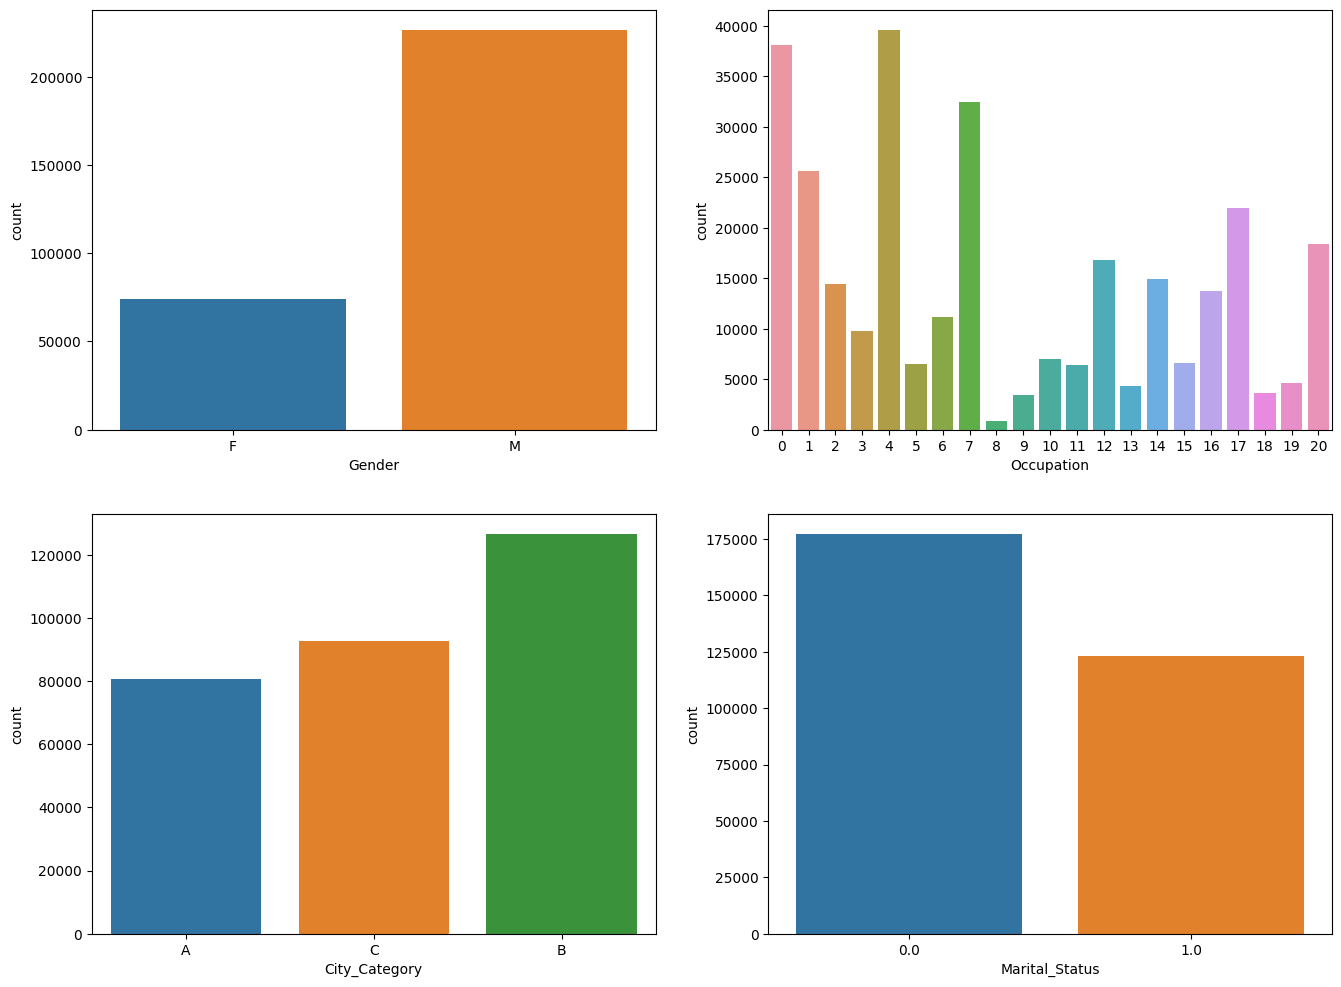

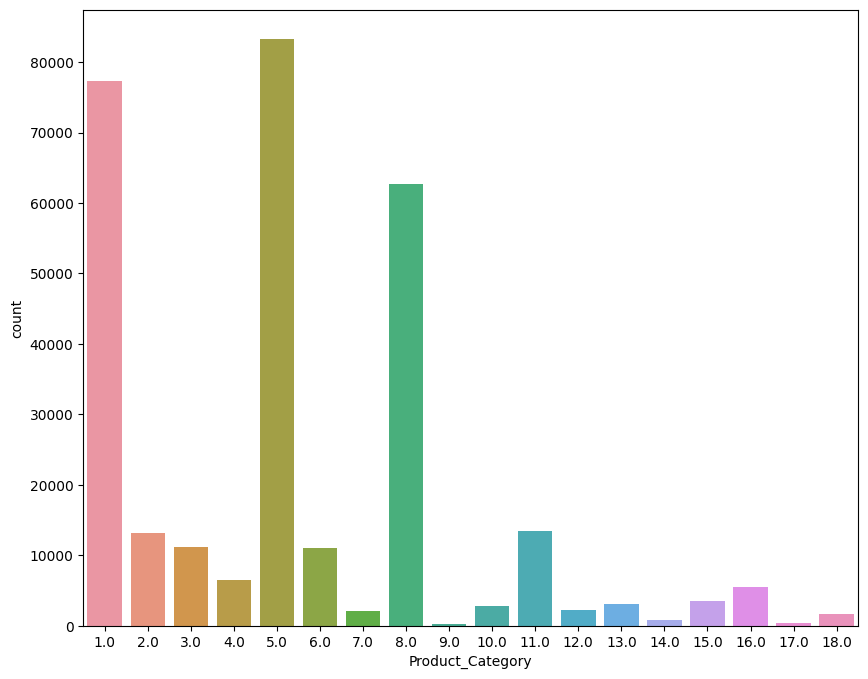

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

#### Observations
- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

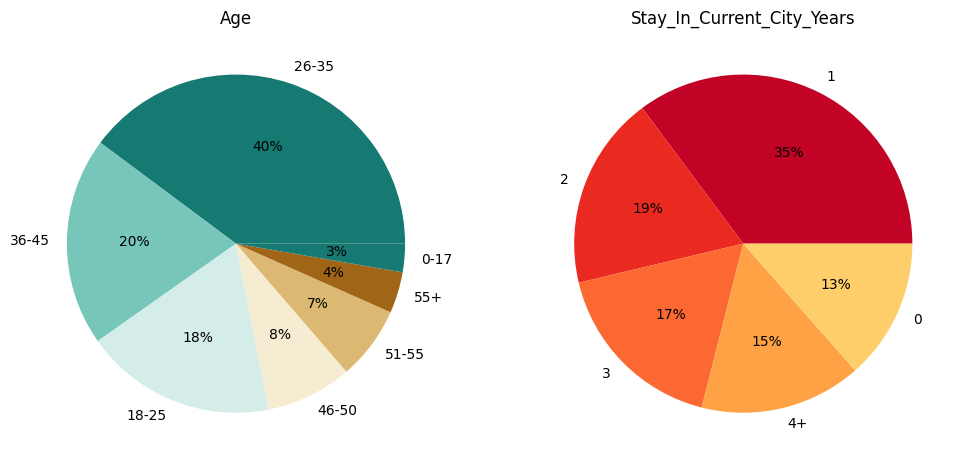

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

Upper two graphs are self-explanatory.

### Bi-variate Analysis

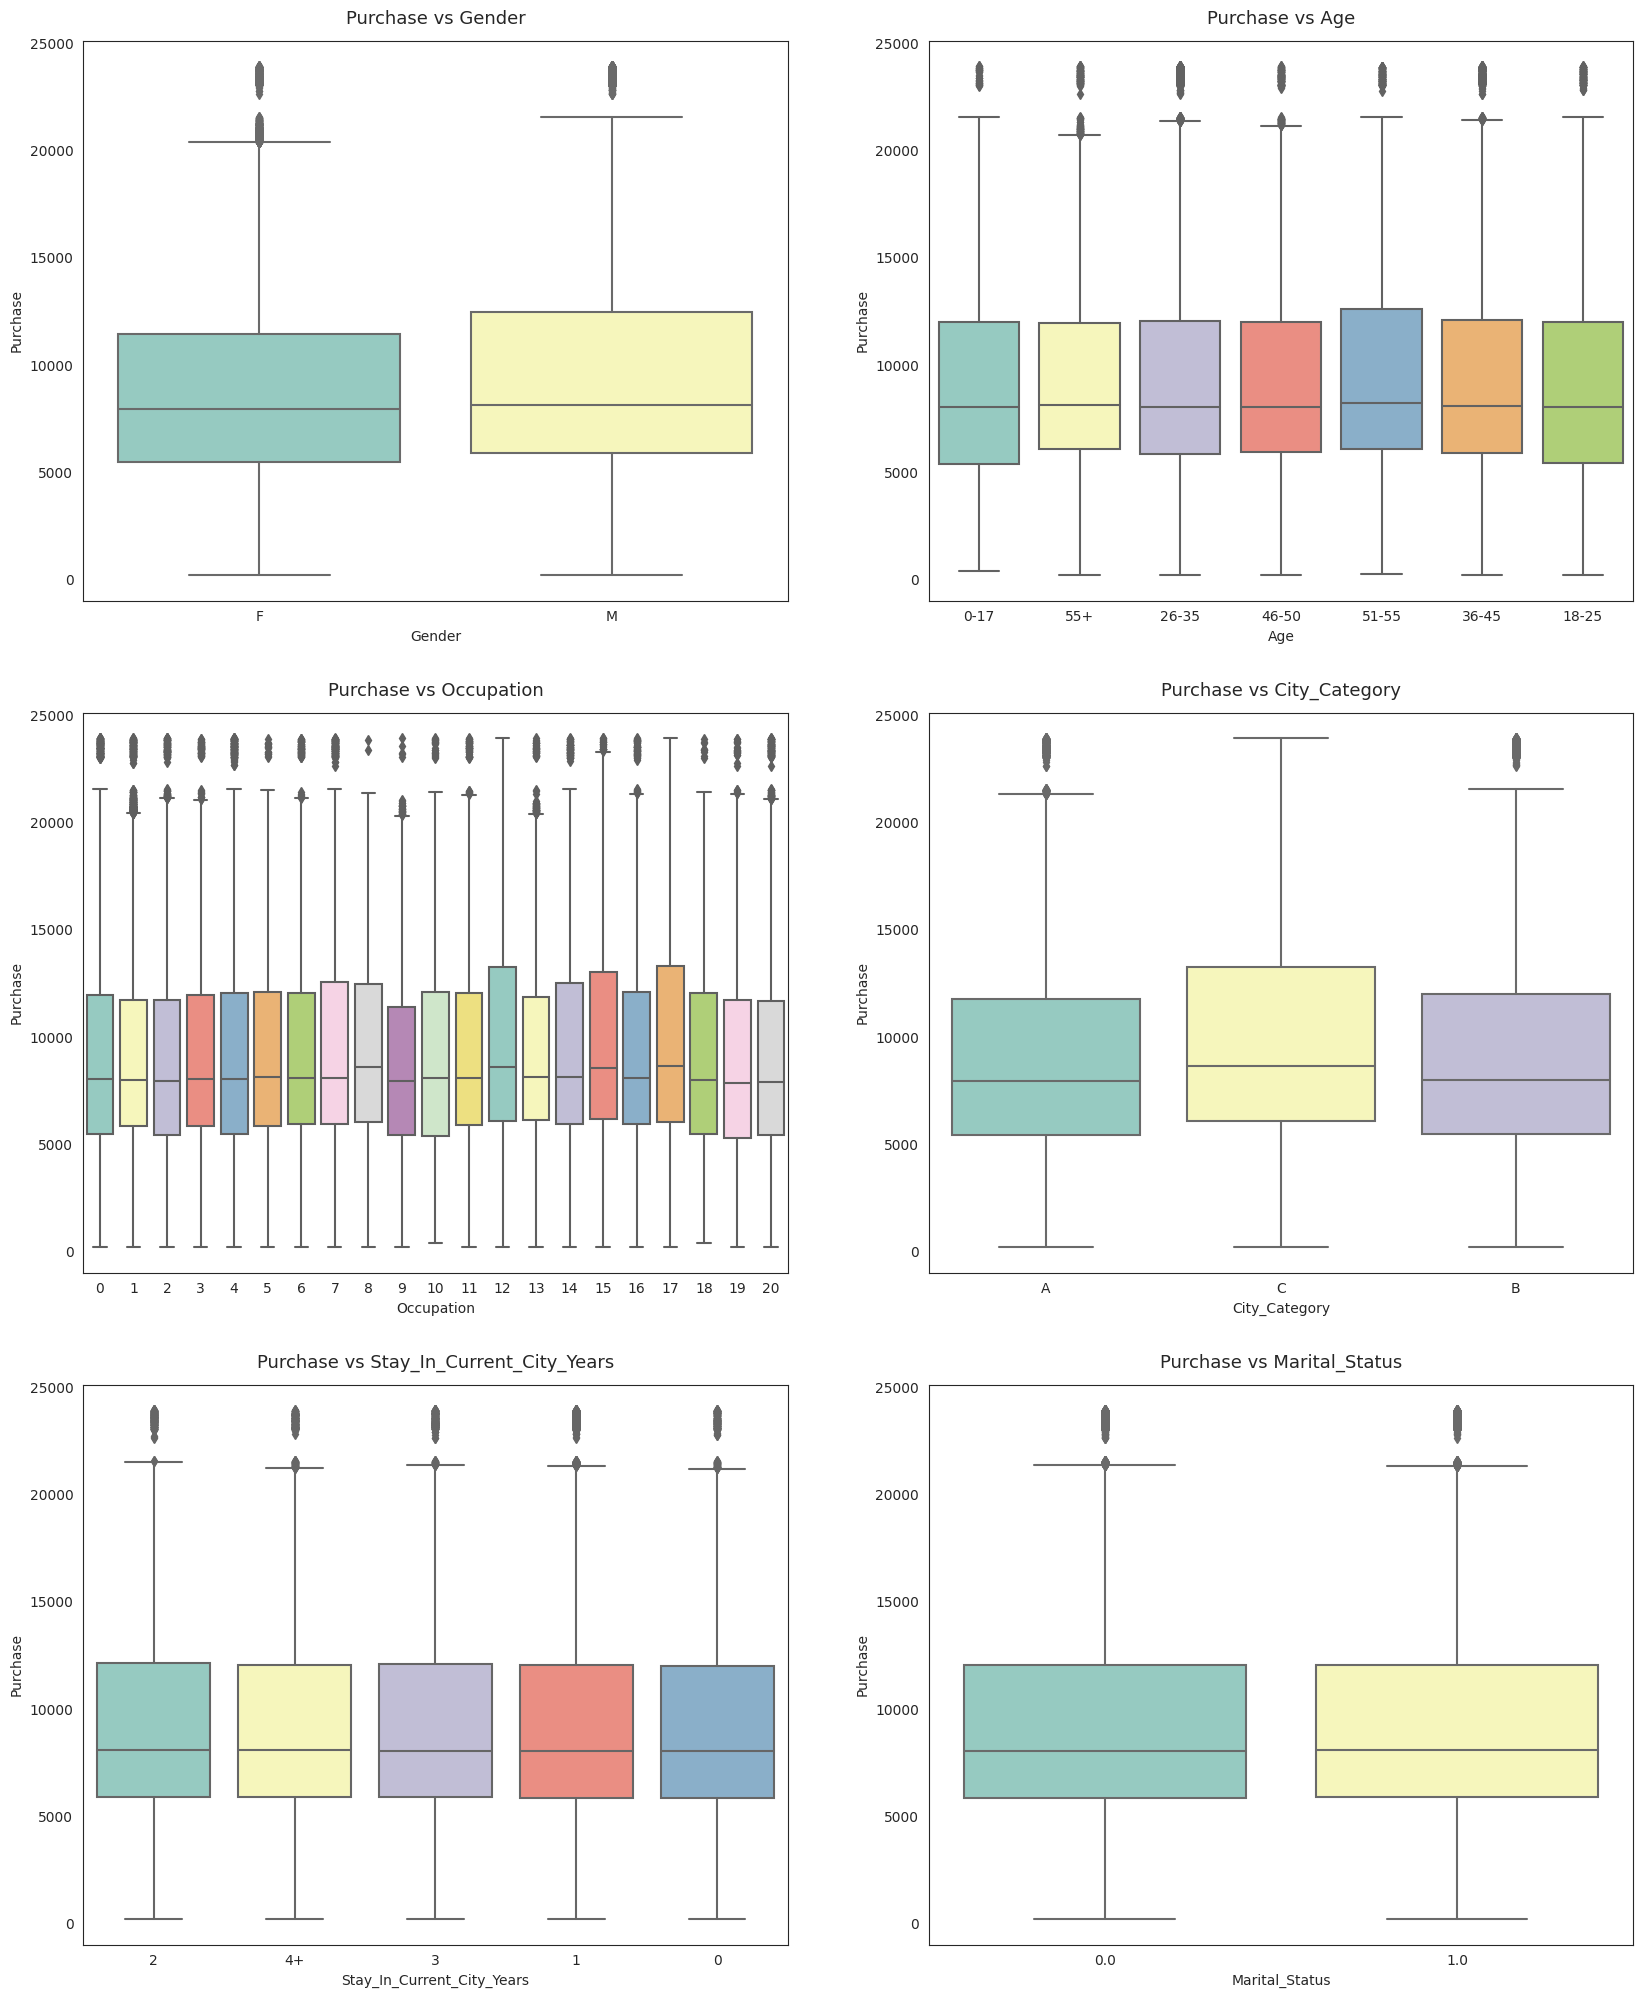

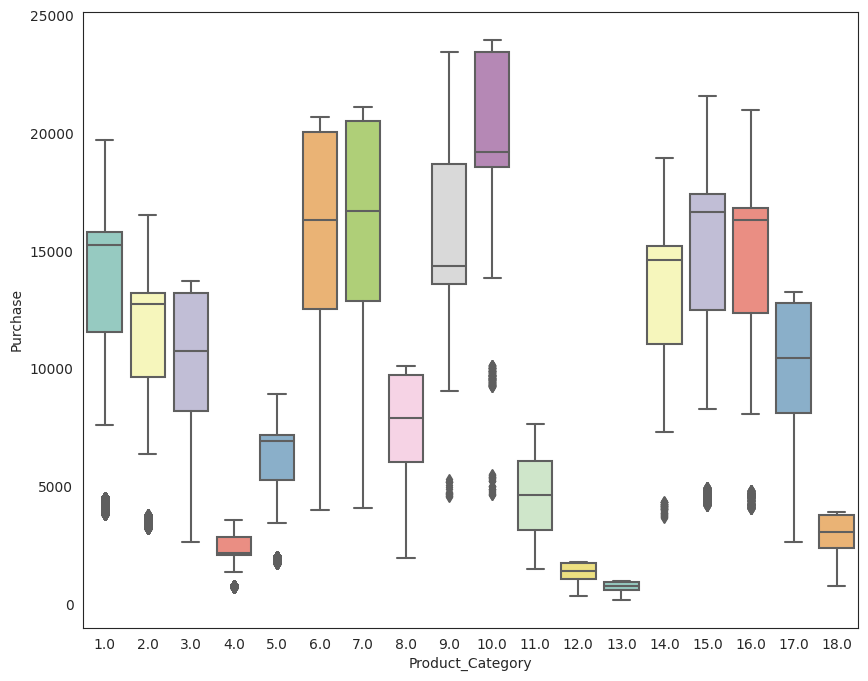

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

### Multivariate Analysis

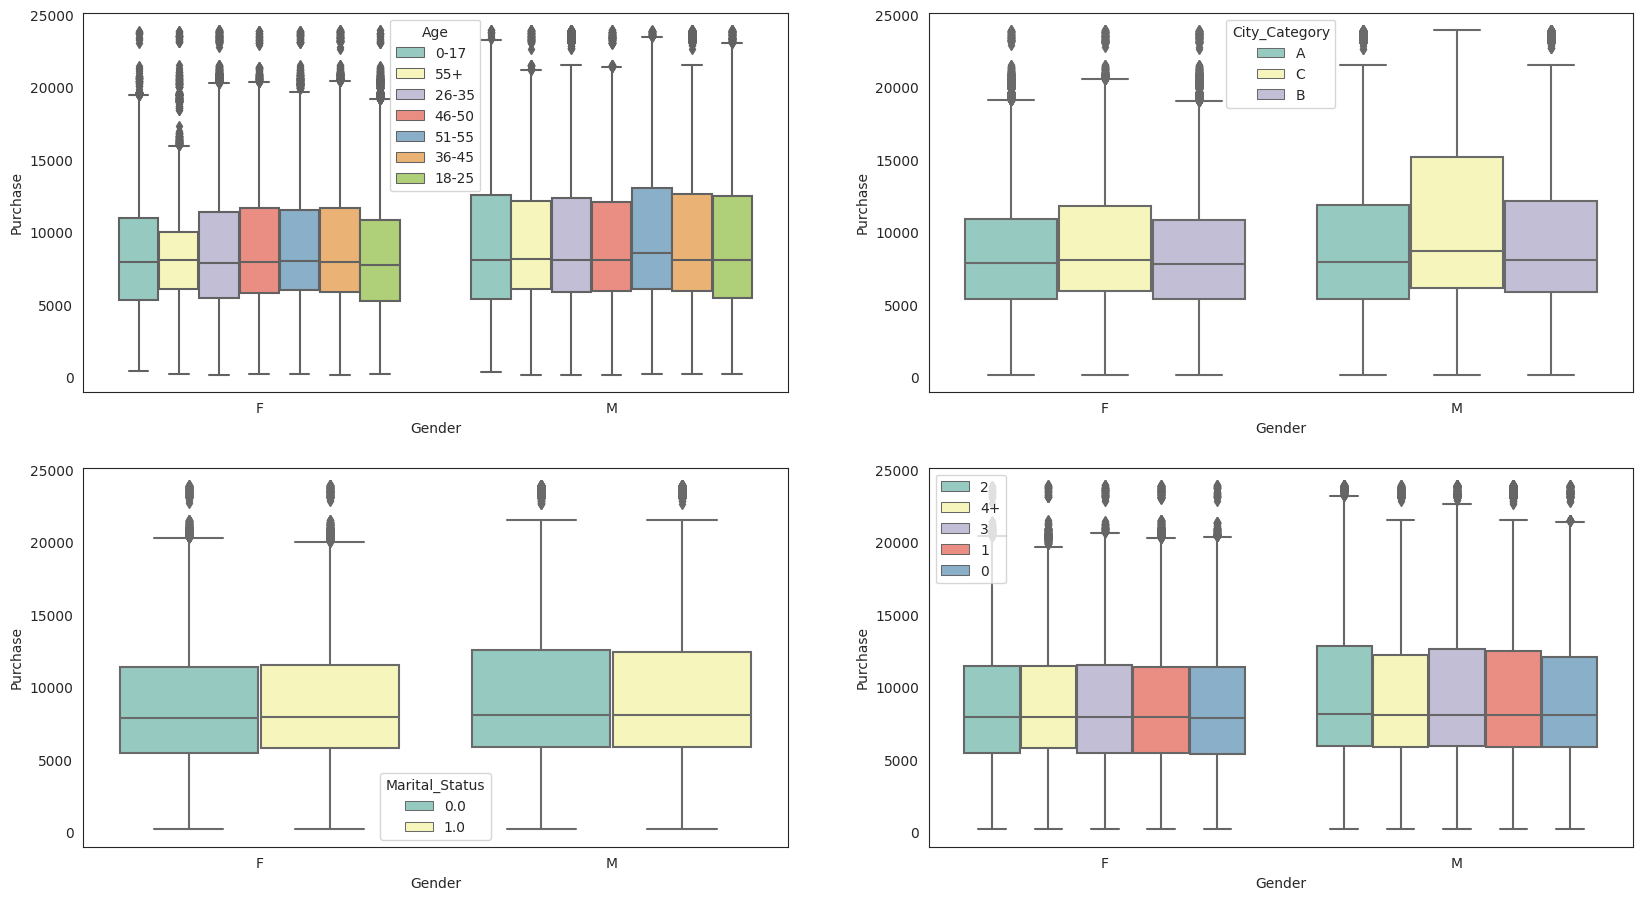

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1.0,8.0,7871.0


**Average amount spend per customer for Male and Female**

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,203559.0
1,1000002,M,336765.0
2,1000003,M,169875.0
3,1000004,M,124754.0
4,1000005,M,412849.0
...,...,...,...
5886,1006036,F,2032097.0
5887,1006037,F,612480.0
5888,1006038,F,18218.0
5889,1006039,F,263905.0


In [ ]:
# Gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

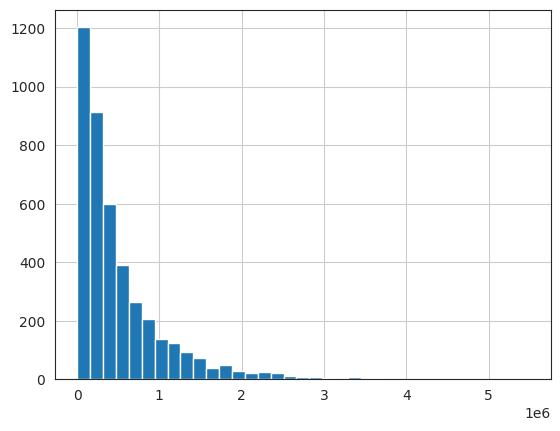

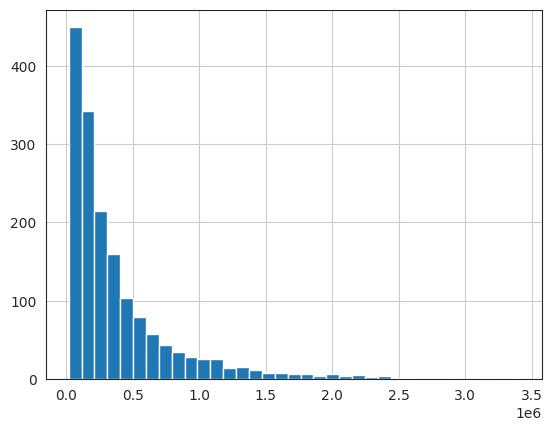

In [ ]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 509341.32
Average amount spend by Female customers: 389932.48


**Observation**

1. Male customers spend more money than female customers

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

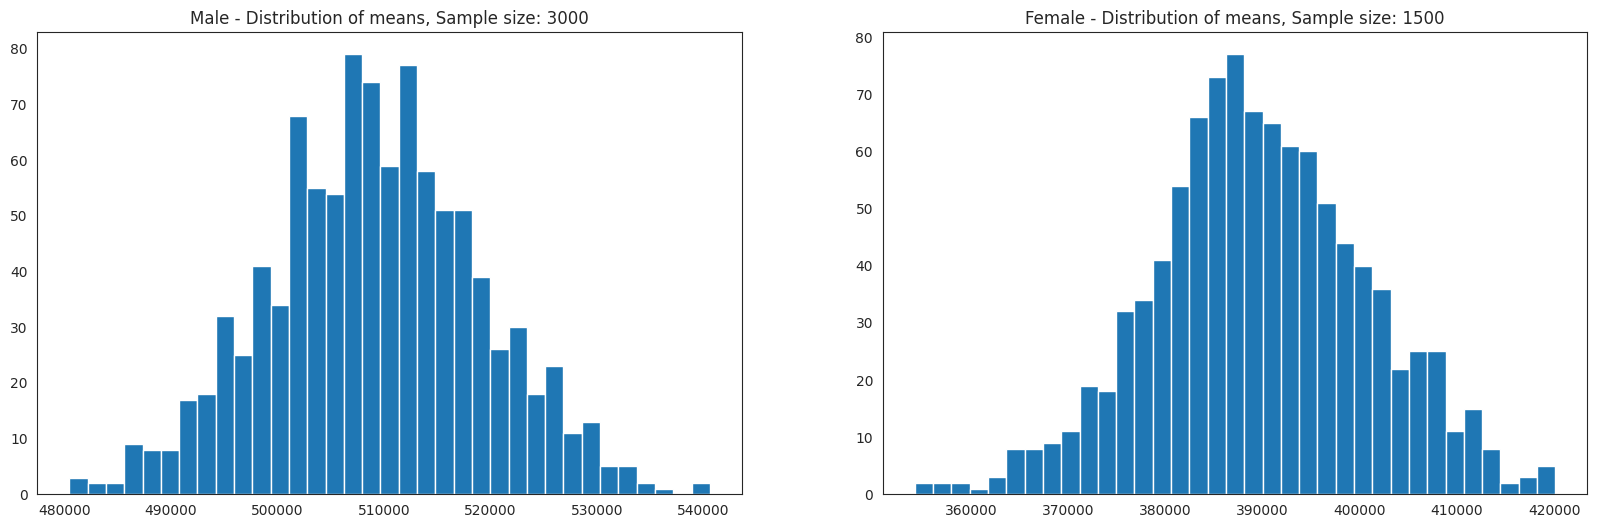

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 509122.25
Population mean - Mean of sample means of amount spend for Female: 389694.98

Male - Sample mean: 509341.32 Sample std: 547761.60
Female - Sample mean: 389932.48 Sample std: 446253.27


**Observation**

Now using the **Central Limit Theorem** for the **population** we can say that:
1. Average amount spend by male customers is **9,26,341.86**
2. Average amount spend by female customers is **7,11,704.09**

In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (492824.20, 525858.44)
Female confidence interval of means: (368503.58, 411361.39)


Now we can infer about the population that, **95% of the times**:

1. Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

#### Doing the same activity for married vs unmarried

In [ ]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,203559.0
1,1000002,M,336765.0
2,1000003,M,169875.0
3,1000004,M,124754.0
4,1000005,M,412849.0
...,...,...,...
5886,1006036,F,2032097.0
5887,1006037,F,612480.0
5888,1006038,F,18218.0
5889,1006039,F,263905.0


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0.0,203559.0
1,1000002,0.0,336765.0
2,1000003,0.0,169875.0
3,1000004,1.0,124754.0
4,1000005,1.0,412849.0
...,...,...,...
5886,1006036,1.0,2032097.0
5887,1006037,0.0,612480.0
5888,1006038,0.0,18218.0
5889,1006039,1.0,263905.0


In [ ]:
amt_df['Marital_Status'].value_counts()

0.0    3417
1.0    2474
Name: Marital_Status, dtype: int64

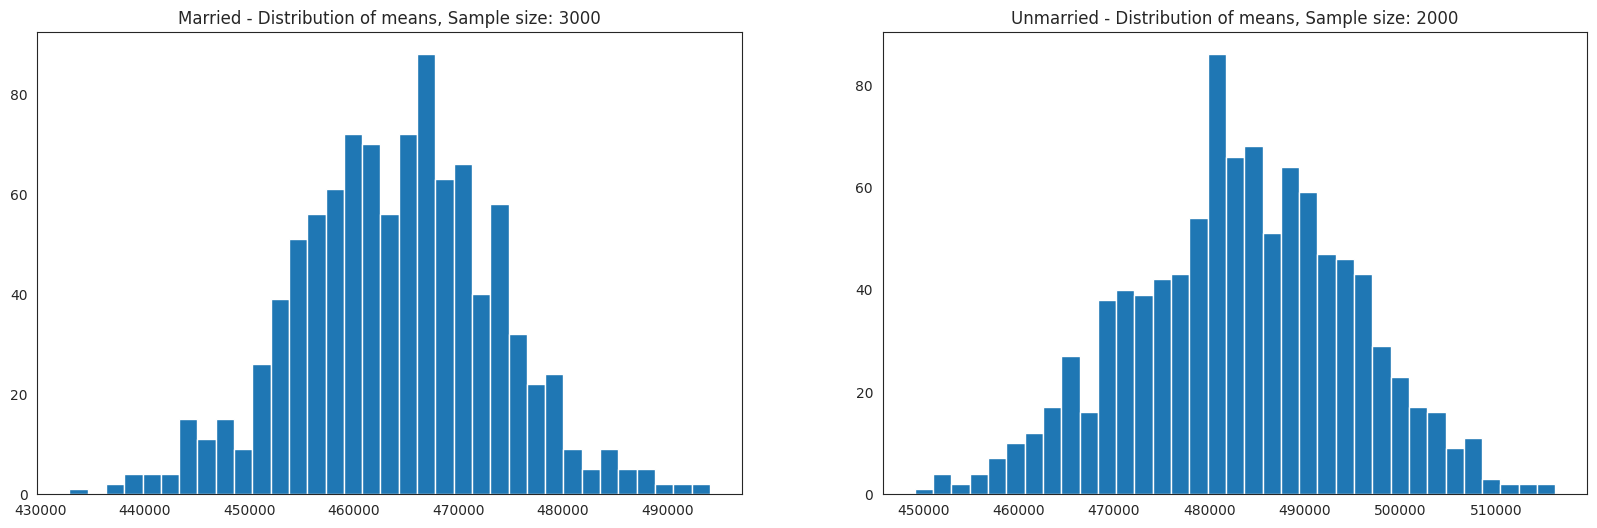

Population mean - Mean of sample means of amount spend for Married: 464081.31
Population mean - Mean of sample means of amount spend for Unmarried: 483324.94

Married - Sample mean: 464330.47 Sample std: 520089.90
Unmarried - Sample mean: 483711.15 Sample std: 526387.79


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (443836.10, 484824.85)
Unmarried confidence interval of means: (466061.37, 501360.93)


### Calculating the average amount spent by Age

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,203559.0
1,1000002,55+,336765.0
2,1000003,26-35,169875.0
3,1000004,46-50,124754.0
4,1000005,26-35,412849.0
...,...,...,...
5886,1006036,26-35,2032097.0
5887,1006037,46-50,612480.0
5888,1006038,55+,18218.0
5889,1006039,46-50,263905.0


In [ ]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (517478.30, 566936.37)
For age 36-45 --> confidence interval of means: (451988.76, 514019.42)
For age 18-25 --> confidence interval of means: (444148.42, 504111.87)
For age 46-50 --> confidence interval of means: (387903.94, 474927.08)
For age 51-55 --> confidence interval of means: (382764.07, 461955.21)
For age 55+ --> confidence interval of means: (264074.97, 335909.88)
For age 0-17 --> confidence interval of means: (289584.77, 390215.54)


### Insights

- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

<br>


- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

<br>

- **Average amount** spend by **Male** customers: **925344.40**
- **Average amount** spend by **Female** customers: **712024.39**

<br>

#### Confidence Interval by Gender
Now using the **Central Limit Theorem** for the **population**:
1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by **male** customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by **female** customer will lie in between: **(673254.77, 750794.02)**


#### Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**


#### Confidence Interval by Age

1. For **age 26-35** --> confidence interval of means: **(945034.42, 1034284.21)**
2. For **age 36-45** --> confidence interval of means: **(823347.80, 935983.62)**
3. For **age 18-25** --> confidence interval of means: **(801632.78, 908093.46)**
4. For **age 46-50** --> confidence interval of means: **(713505.63, 871591.93)**
5. For **age 51-55** --> confidence interval of means: **(692392.43, 834009.42)**
6. For **age 55+** --> confidence interval of means: **(476948.26, 602446.23)**
7. For **age 0-17** --> confidence interval of means: **(527662.46, 710073.17)**

### Recommendations

1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. **Product_Category - 1, 5, 8, & 11** have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. **Unmarried** customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the **age 18-45** spend more money than the others, So company should focus on acquisition of customers who are in the **age 18-45**
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.